### Model Orders

We have combined 6 sample time series into a single csv that you can access here.

1) Read in the data.

2) Make the "Date" column a datetime index with a weekly frequency.

        # Make Date a datetime object
        df['Date'] = pd.to_datetime(df['Date'])
        # Make Date the index
        df = df.set_index('Date')
        # We have weekly data so we will set our frequency to W
        df.index.freq= "W"

3) Split the dataframe into the separate time series:

        # Split the dataframe into 6 different time series
        ts_1 = df['ts_1']
        ts_2 = df['ts_2']
        ts_3 = df['ts_3']
        ts_4 = df['ts_4']
        ts_5 = df['ts_5']
        ts_6 = df['ts_6']

4) For each time series,
* Plot the time series
* Check for stationarity
* Determine if differencing is needed (d)
* View the ACF and PACF plots of the stationary data to infer potential model type and orders

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
from pmdarima.arima.utils import ndiffs

In [2]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [3]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

#### 1) Read in the data.

In [4]:
# Load Data
df = pd.read_csv('Data/example_time_series.csv')
df

,Date,ts_1,ts_2,ts_3,ts_4,ts_5,ts_6
0,2020-01-05,0.422207,-0.334830,-0.194485,0.304119,0.335330,0.628650
1,2020-01-12,-0.455290,-0.343508,-0.649775,0.385431,0.253175,-0.062857
2,2020-01-19,0.914767,-0.080714,0.264993,0.987436,0.202251,0.474599
3,2020-01-26,0.562761,0.010582,0.827754,0.830760,0.137298,-0.591919
4,2020-02-02,-0.649239,-0.088101,0.178515,-0.827785,0.305798,-0.372528
...,...,...,...,...,...,...,...
195,2023-10-01,-0.180337,0.034521,-3.690399,0.698037,0.730687,-0.901562
196,2023-10-08,-0.607009,-0.126291,-4.297408,-1.720225,0.582334,0.515721
197,2023-10-15,0.616274,-0.242378,-3.681135,2.085681,0.703901,0.801864
198,2023-10-22,-0.443541,-0.226903,-4.124676,-1.755198,0.634631,0.894529


#### 2) Make the "Date" column a datetime index with a weekly frequency.

In [5]:
# Make Date a datetime object 
df['Date'] = pd.to_datetime(df['Date'])
# Make Date the index
df = df.set_index('Date')
# We have weekly data so we will set our frequency to W
df.index.freq= "W"

#### 3) Split the dataframe into the separate time series:

In [6]:
# Split the dataframe into 6 different time series
ts_1 = df['ts_1']
ts_2 = df['ts_2']
ts_3 = df['ts_3']
ts_4 = df['ts_4']
ts_5 = df['ts_5']
ts_6 = df['ts_6']

### 4) For each time series,
* Plot the time series
* Check for stationarity
* Determine if differencing is needed (d)
* View the ACF and PACF plots of the stationary data to infer potential model type and orders

### ts_1

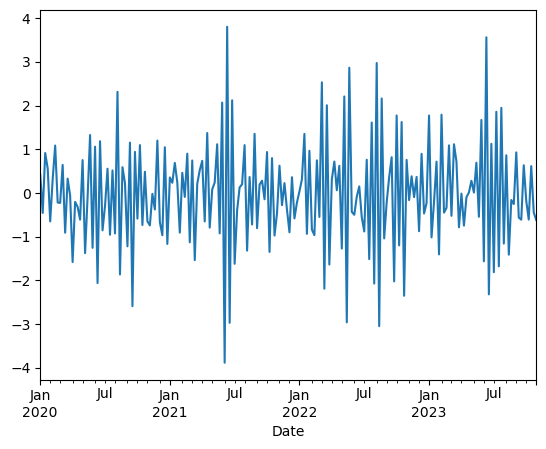

In [7]:
# Plot ts_1
ts_1.plot();

In [8]:
# Check for stationarity
get_adfuller_results(ts_1)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-14.612186,1,198,0.0,0.05,True


The original data is stationary. Differencing is not needed.

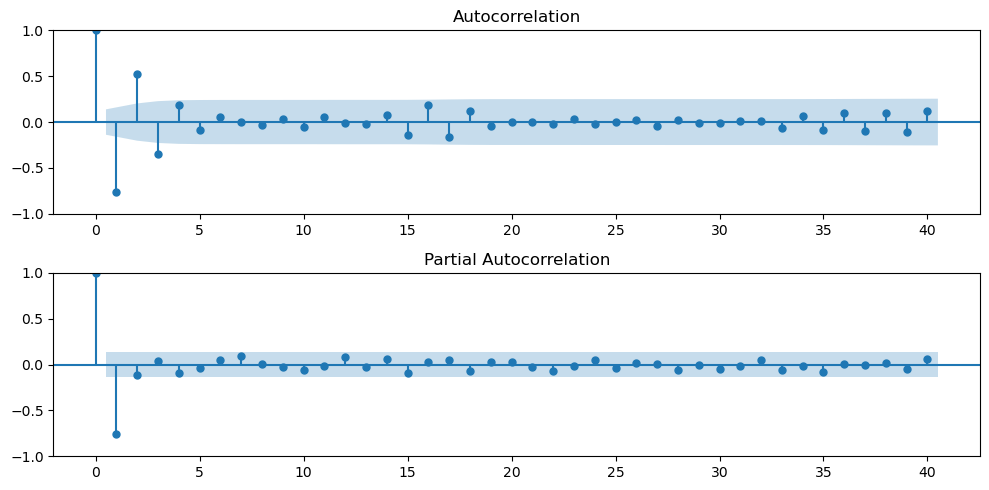

In [9]:
# View the ACF and PACF plots of the stationary data to infer potential model type and orders
plot_acf_pacf(ts_1);

Interpretation:
* ACF plot has a gradual decrease
* Dramatic dropoff occurs for PACF after the 1st lag
* Should try AR model, order = (1,0,0)

### ts_2

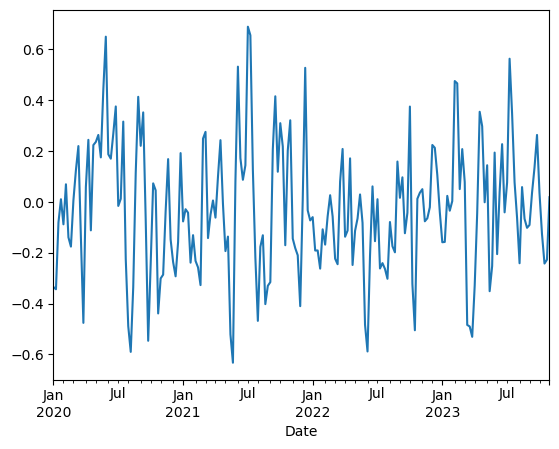

In [10]:
# Plot ts_2
ts_2.plot();

In [11]:
# Check for stationarity
get_adfuller_results(ts_2)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-6.139526,5,194,0.0,0.05,True


The original data is stationary. Differencing is not needed.

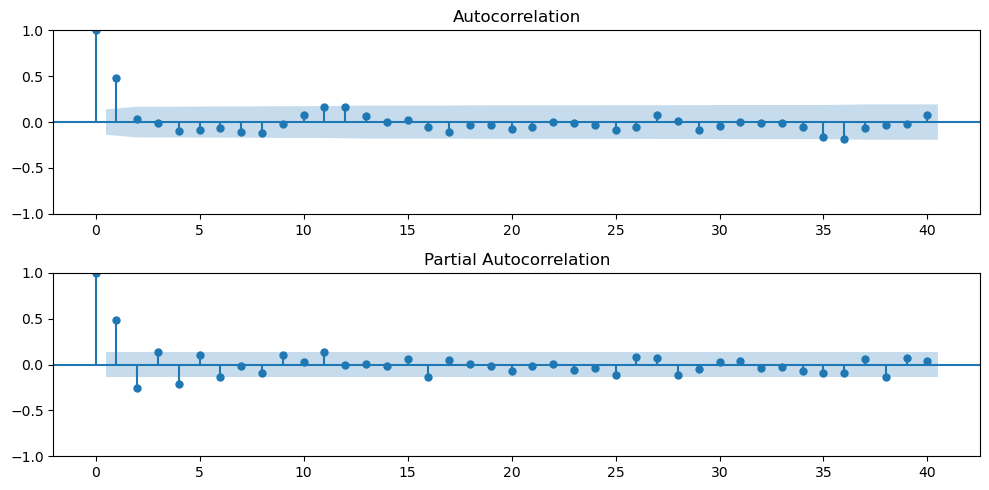

In [12]:
# View the ACF and PACF plots of the stationary data to infer potential model type and orders
plot_acf_pacf(ts_2);

Interpretation:

* Dramatic dropoff occurs for ACF after the 1st lag
* PACF plot has a gradual decrease
* Should try MA model, order = (0,0,1)

### ts_3

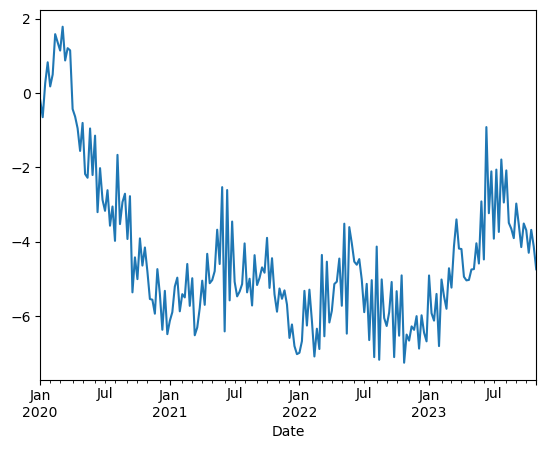

In [13]:
# Plot ts_3
ts_3.plot();

In [14]:
# Check for stationarity
get_adfuller_results(ts_3)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-2.366153,2,197,0.151518,0.05,False


In [17]:
# The original data is not stationary. 
# Check to see how many differencing are needed
ndiffs(ts_3)

1

In [18]:
# Will apply differencing one time
ts_3_diff = ts_3.diff().dropna()
# Confirm stationarity with adfuller test
get_adfuller_results(ts_3_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-14.597695,1,197,0.0,0.05,True


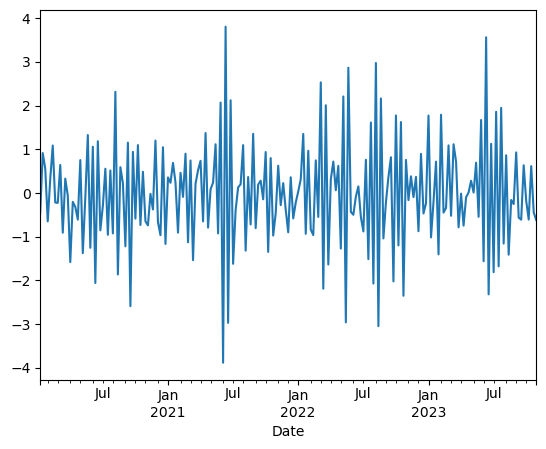

In [19]:
#Plot differenced data
ts_3_diff.plot();

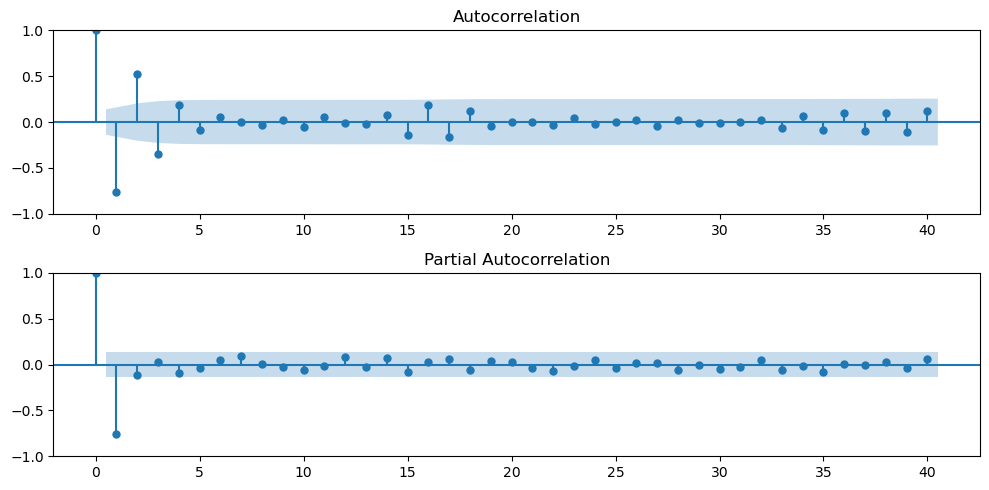

In [20]:
# Use differenced (stationary) data to plot ACF and PACF
plot_acf_pacf(ts_3_diff);

Interpretation:

* ACF plot has a gradual decrease
* Dramatic dropoff occurs for PACF after the 1st lag
* Should try AR model, order = (1,1,0)

### ts_4

In [ ]:
# Plot ts_4
ts_4.plot();

### ts_5

In [ ]:
# Plot ts_5
ts_5.plot();

### ts_6

In [ ]:
# Plot ts_6
ts_6.plot();